In [16]:
%matplotlib widget
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat.behaviour import extract_behaviour

root = '/home/loulou/Documents/Data/Test/place_cells2'

spks = np.load('/'.join((root, 'suite2p/plane0/spks.npy')), allow_pickle=True)
md = np.load('/'.join((root, 'suite2p/plane0/model.npy')), allow_pickle=True)
iscell = np.load('/'.join((root, 'suite2p/plane0/iscell.npy')), allow_pickle=True)
iscell = iscell[:, 0].astype(bool)
spks = spks[iscell, :]

fn = '/home/loulou/Documents/Data/Test/place_cells2/behaviour_00009.h5'
behaviour = extract_behaviour(fn)

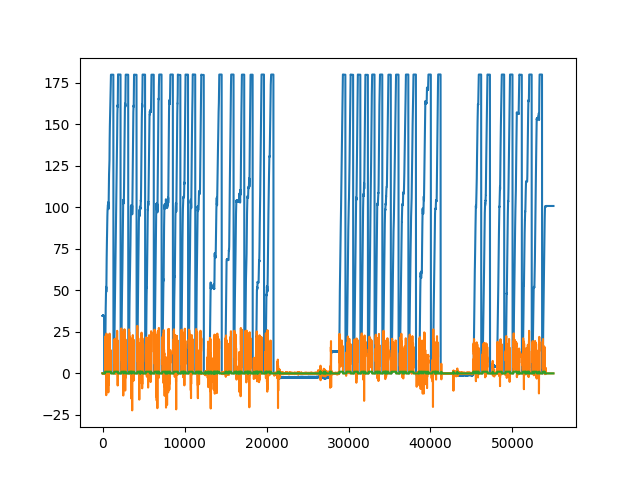

In [13]:
fig = plt.figure()
plt.plot(behaviour['position'])
plt.plot(behaviour['velocity'])
plt.plot(behaviour['movement'])

Output()

/tmp/ipykernel_1279379/3222624143.py:6: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_1279379/3222624143.py:11: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_1279379/3222624143.py:14: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


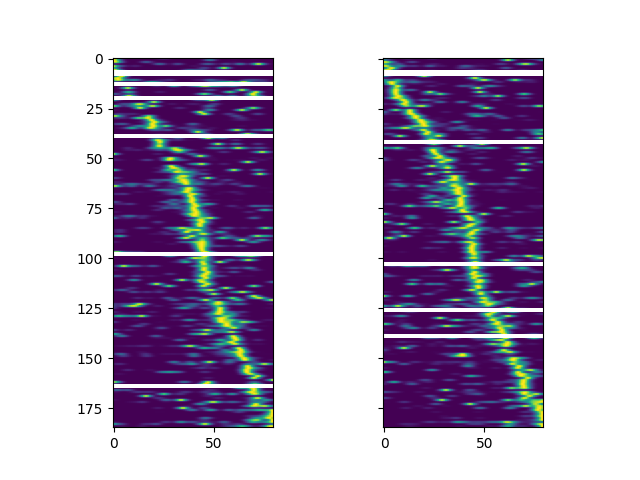

In [14]:
from suite2p.blat import space

hmap = space.hmaps(behaviour, spks)
stack = hmap['smooth']['stack'].T
rasters = hmap['smooth']['rasters']
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

# fig = plt.figure()
# plt.imshow(rasters[9, :, :].T)
# plt.plot(behaviour['position'][behaviour['movement']])

In [53]:
from suite2p.blat import space

hmap1 = space.hmaps(behaviour, spks)
hmap2 = space.hmaps(behaviour, spks)
hmap3 = space.hmaps(behaviour, spks)
p1 = hmap1['prob']
p2 = hmap2['prob']
p3 = hmap3['prob']

Output()

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:70: RuntimeWarning: invalid value encountered in divide
  rasters = np.array([np.histogramdd(idx, range=ranges, bins=bins, weights=spks[i, :])[0] for i in range(spks.shape[0])])


Output()

Output()

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  2.,  4.,  1.,  1.,  1.,
         3.,  4.,  3.,  1.,  6.,  3.,  9., 11.,  8., 10., 23., 90.]),
 array([0.024  , 0.06296, 0.10192, 0.14088, 0.17984, 0.2188 , 0.25776,
        0.29672, 0.33568, 0.37464, 0.4136 , 0.45256, 0.49152, 0.53048,
        0.56944, 0.6084 , 0.64736, 0.68632, 0.72528, 0.76424, 0.8032 ,
        0.84216, 0.88112, 0.92008, 0.95904, 0.998  ]),
 <BarContainer object of 25 artists>)

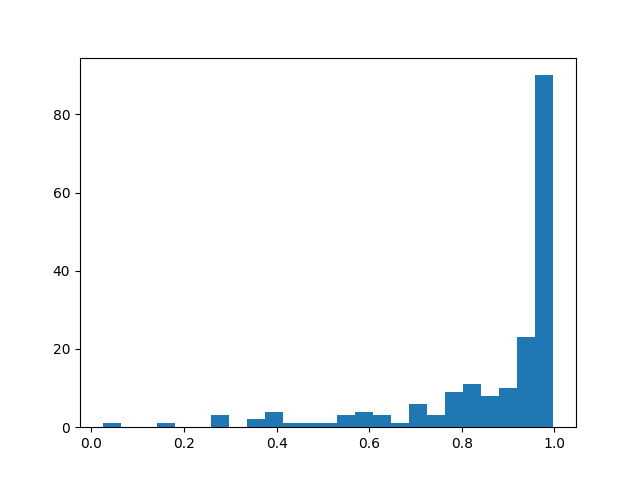

In [54]:
fig = plt.figure()
plt.hist(p1, 25)

In [57]:
prc = np.max(p1)
print(np.sum(p1 >= prc))
print(np.sum(p2 >= prc))
print(np.sum(p3 >= prc))

20
22
22


/tmp/ipykernel_694257/556416614.py:7: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
/tmp/ipykernel_694257/556416614.py:10: RuntimeWarning: invalid value encountered in divide
  stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)


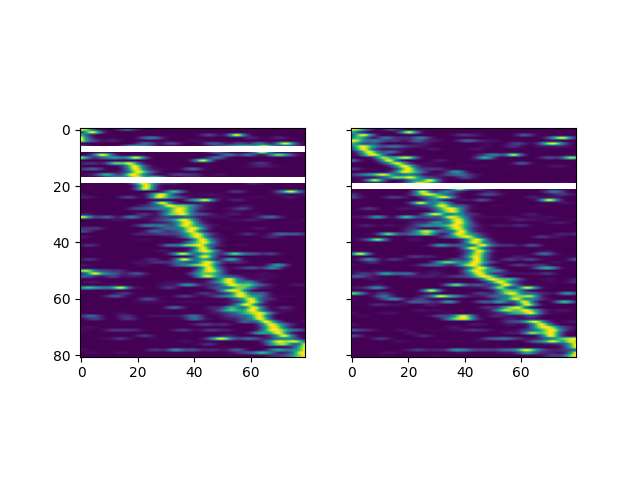

In [17]:
stack = hmap['smooth']['stack'][p3 >= .95, :].T
rasters = hmap['smooth']['rasters'][p3 >= .95, :, :]
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

90


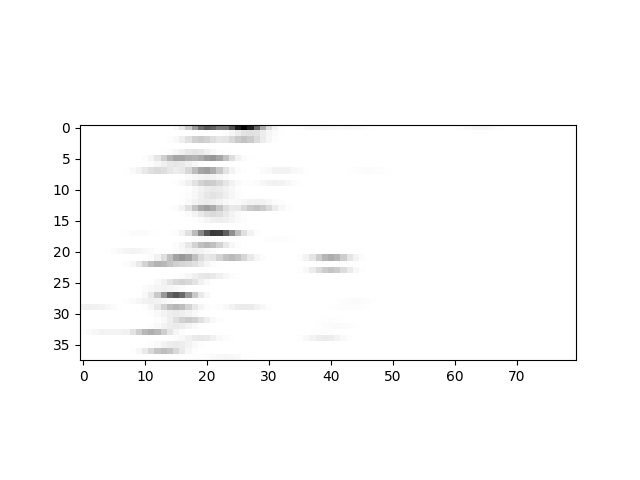

In [299]:
idx = np.argmax(hmap['SI'])
print(idx)
fig = plt.figure()
plt.imshow(-hmap['smooth']['rasters'][idx, :, :].T, cmap='gray')

In [30]:
from suite2p.blat import utils
from suite2p.blat.KSG import ksg_mi

x = spks
y = behaviour['position']
x = utils.fast_smooth(x, 30, axis=1)
%lprun -f ksg_mi I = ksg_mi(x, y)

print(I)

[0.59973834 0.78234979 0.61408031 0.86966553 0.81460116 0.80325108
 0.14137635 0.77491198 0.71126626 0.56435886 0.95225315 0.84284447
 0.69525208 0.80198785 0.79401912 0.49795861 0.84605743 0.77216241
 0.7241691  0.76146817 0.88355507 0.68103472 0.73853166 0.70094649
 0.79401147 0.78679996 0.65870508 0.84729657 0.76712545 0.69002234
 0.86932387 0.87236957 0.84089401 0.58183476 1.07865767 0.84080822
 0.76192786 0.84851199 0.89411167 0.81923428 0.85614378 0.71892513
 0.61588042 0.79346479 0.85102473 0.62882334 0.67537029 1.00402229
 0.77188161 0.84541422 0.88272592 0.63182505 0.78921127 0.82182594
 0.82426402 0.76047083 0.79667389 0.86843394 0.29652043 0.81170761
 0.77088479 0.632431   0.82757624 0.61380335 0.85386029 0.82148856
 0.7528741  0.78940291 0.84280984 0.77828569 0.74914661 0.79730864
 0.81869365 0.90466533 0.76627665 0.824912   0.8600211  0.5825879
 0.77063182 0.62927891 0.71964036 0.64273518 0.79056271 0.75583205
 0.53451916 0.83912361 0.83006812 0.31932798 0.79349975 0.83277

Timer unit: 1e-09 s

Total time: 1.03651 s
File: /home/loulou/Documents/GitHub/suite2p/suite2p/blat/KSG.py
Function: ksg_mi at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def ksg_mi(x: np.ndarray, y: np.ndarray, k=5, method=1) -> np.ndarray:
    24                                               """
    25                                               KSG estimator for mutual information.
    26                                               This is an implementation of the second algorithm
    27                                               as we cannot make assumptions on equality of marginal
    28                                               spaces, especially with calcium data.
    29                                               Units of bits.
    30                                               I did everything to extract every bit of performance T_T
    31                                               "

In [149]:
print(np.argmax(I))

90


(array([ 1.,  0.,  1.,  1.,  0.,  0.,  3.,  4.,  2., 11., 16., 28., 29.,
        30., 19.,  8.,  8.,  7.,  6.,  5.,  2.,  0.,  2.,  1.,  1.]),
 array([0.42662851, 0.48412419, 0.54161987, 0.59911555, 0.65661123,
        0.71410692, 0.7716026 , 0.82909828, 0.88659396, 0.94408964,
        1.00158532, 1.05908101, 1.11657669, 1.17407237, 1.23156805,
        1.28906373, 1.34655941, 1.40405509, 1.46155078, 1.51904646,
        1.57654214, 1.63403782, 1.6915335 , 1.74902918, 1.80652487,
        1.86402055]),
 <BarContainer object of 25 artists>)

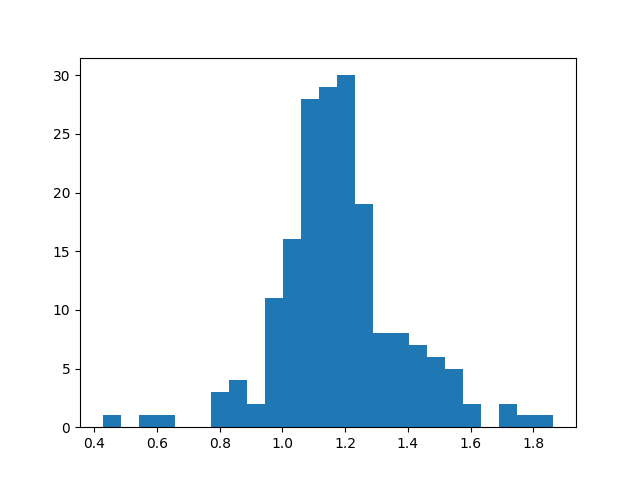

In [150]:
fig = plt.figure()
plt.hist(I, 25)

In [7]:
import numpy as np
from suite2p.blat.twocol_unique import twocol_unique

# %prun twocol_unique(np.random.rand(1_000_000, 2).astype('float64'))
%prun np.unique(np.random.rand(1_000_000, 2).astype('float64'), axis=0)

         630 function calls (625 primitive calls) in 1.011 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.975    0.975    0.975    0.975 {method 'sort' of 'numpy.ndarray' objects}
        1    0.012    0.012    0.012    0.012 arraysetops.py:323(_unique1d)
        1    0.006    0.006    0.006    0.006 {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
        1    0.006    0.006    0.006    0.006 {method 'flatten' of 'numpy.ndarray' objects}
        2    0.004    0.002    0.004    0.002 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.003    0.003    0.003    0.003 {method 'astype' of 'numpy.ndarray' objects}
        1    0.001    0.001    0.006    0.006 history.py:55(only_when_enabled)
        1    0.001    0.001    0.994    0.994 <string>:1(<module>)
        2    0.000    0.000    0.001    0.001 zmqstream.py:557(_run_callback)
        1    0.000    0.000    0.000    0.000 {method